# Exercises
For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:
>`pip install vega_datasets`

In [1]:
from vega_datasets import data #library retrieving data from
import pandas as pd #library for numerical operations
import matplotlib.pyplot as plt #visualizations library


# `sf_temps`

In [2]:
df_sf = data.sf_temps()
df_sf.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df_sf = df_sf.set_index('date').sort_index()
df_sf.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 1. Resample w/Average temp
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
# df of average temperatures by day
df_sf.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


In [6]:
mean = df_sf.resample('D').mean()

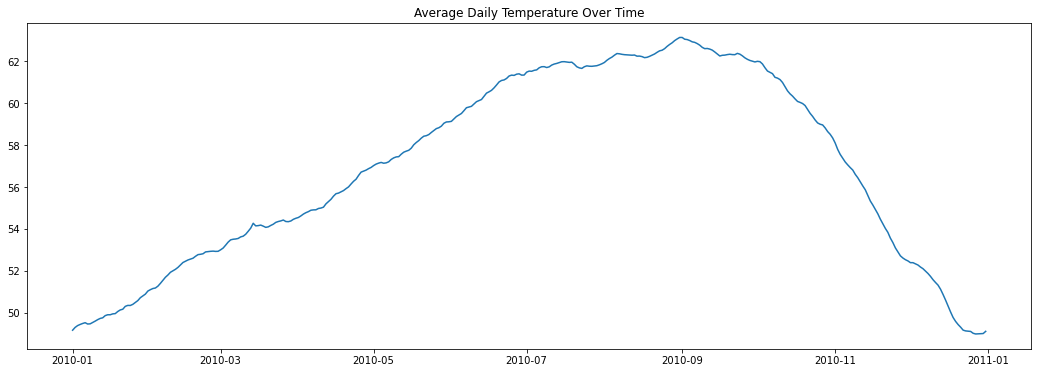

In [7]:
# plotting average daily temp over time
plt.figure(figsize = (18, 6))

plt.plot(df_sf.resample('D').mean())
plt.title('Average Daily Temperature Over Time')
plt.show();

### 2. Minimum Temperature Over Time
Write the code necessary to visualize the minimum temperature over time.

In [8]:
df_sf.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


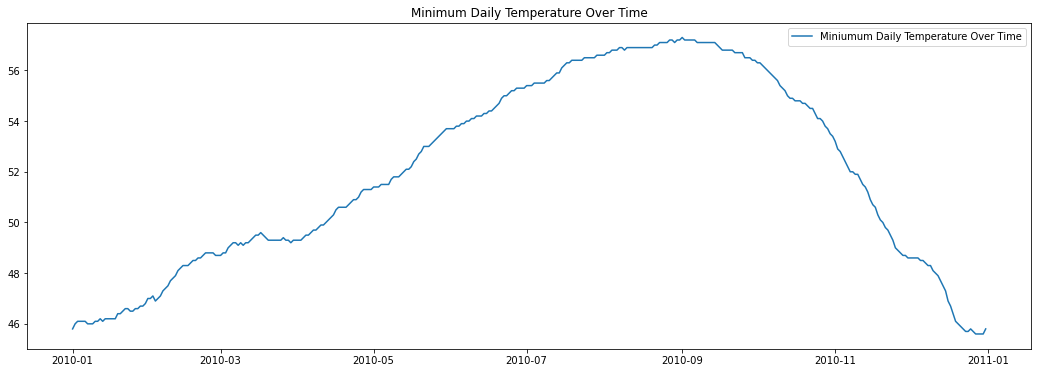

In [9]:
plt.figure(figsize = (18, 6))

plt.plot(df_sf.resample('D').min(), label = 'Miniumum Daily Temperature Over Time')

plt.title('Minimum Daily Temperature Over Time')
plt.legend()
plt.show();

NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='date'>

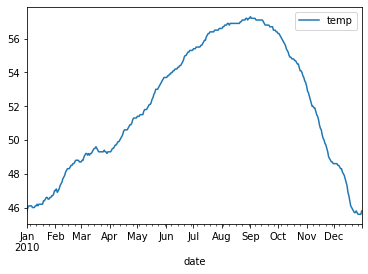

In [10]:
df_sf.resample('D').min().plot()

### 3. Max Temperature Over Time
Write the code necessary to visualize the maximum temperature over time.


In [11]:
df_sf.resample('D').max()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8
...,...
2010-12-27,53.2
2010-12-28,53.2
2010-12-29,53.2


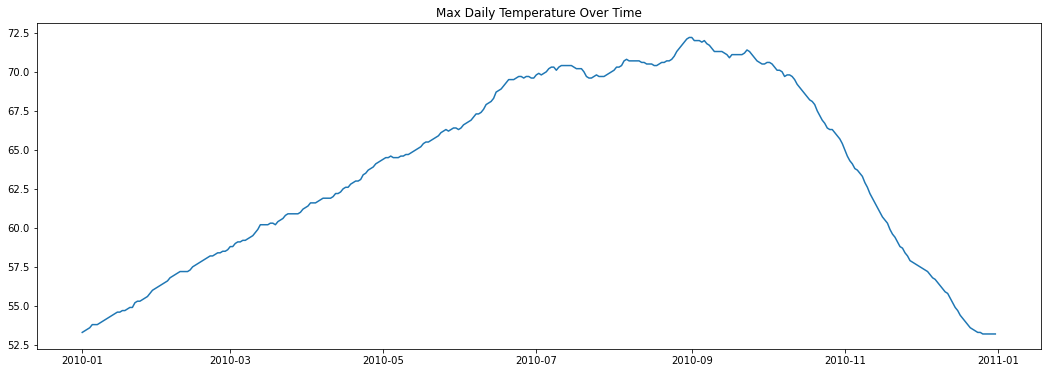

In [12]:
plt.figure(figsize = (18, 6))

plt.plot(df_sf.resample('D').max())
plt.title('Max Daily Temperature Over Time')
plt.show()

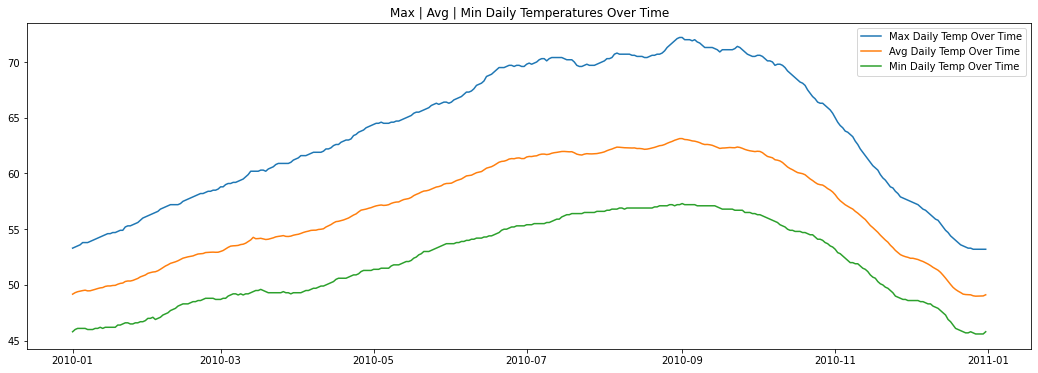

In [13]:
plt.figure(figsize = (18, 6))

plt.plot(df_sf.resample('D').max(), label = 'Max Daily Temp Over Time')
plt.plot(df_sf.resample('D').mean(), label = 'Avg Daily Temp Over Time')
plt.plot(df_sf.resample('D').min(), label = 'Min Daily Temp Over Time')

plt.title('Max | Avg | Min Daily Temperatures Over Time')
plt.legend()
plt.show();


### 4. Coldest Month on Average
Which month is the coldest, on average?

In [14]:
df_sf.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
...,...
2010-08-31,62.405376
2010-09-30,62.487083
2010-10-31,60.253091


In [15]:
df_sf.resample('M').mean().sort_values(by = 'temp').head(1)

,temp
date,
2010-01-31,49.98414


### 5. Month with Highest Average Temperature
Which month has the highest average temperature?

In [16]:
df_sf.resample('M').mean().sort_values(by = 'temp', ascending = False).head(1)

,temp
date,
2010-09-30,62.487083


### 6. Min/Max Temp for Each Day
Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max']))`. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [17]:
df_sf_Δ = df_sf.resample('D').min().rename(columns = {'temp': 'min_temp'})
df_sf_Δ.head()
# df_sf['max'] = df_sf.resample('D')

,min_temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


In [18]:
df_sf.resample('D').max().head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


In [19]:
df_sf_Δ['max_temp'] = df_sf.resample('D').max()
df_sf_Δ.head()

,min_temp,max_temp
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [20]:
df_sf_Δ['temp_Δ'] = df_sf_Δ.max_temp - df_sf_Δ.min_temp
df_sf_Δ.head()

,min_temp,max_temp,temp_Δ
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [21]:
df_sf_Δ.resample('M').mean()

,min_temp,max_temp,temp_Δ
date,,,
2010-01-31,46.309677,54.651613,8.341935
2010-02-28,48.064286,57.550000,9.485714
2010-03-31,49.238710,60.093548,10.854839
2010-04-30,50.326667,62.646667,12.320000
2010-05-31,52.403226,65.312903,12.909677
...,...,...,...
2010-08-31,56.941935,70.812903,13.870968
2010-09-30,56.903333,71.306667,14.403333
2010-10-31,54.932258,68.364516,13.432258


In [22]:
df_sf_Δ.resample('M').max().sort_values(by = 'temp_Δ', ascending = False).head(1)

,min_temp,max_temp,temp_Δ
date,,,
2010-08-31,57.2,72.2,15.0


In [23]:
# INCORRECT, SEE CORRECTED SOLUTION ABOVE ^ 
#September is the month with the highest temp_Δ/variability
df_sf_Δ.resample('M').mean().sort_values(by = 'temp_Δ', ascending = False).head(1)

,min_temp,max_temp,temp_Δ
date,,,
2010-09-30,56.903333,71.306667,14.403333


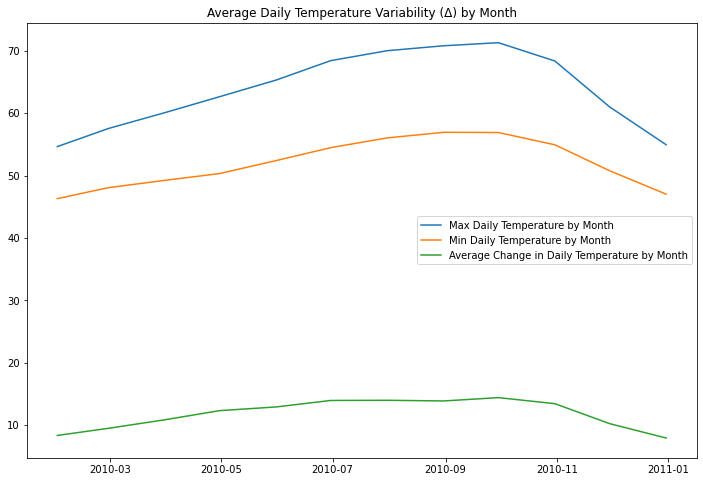

In [24]:
plt.figure(figsize = (12, 8))
plt.plot(df_sf_Δ.resample('M').mean().max_temp, label = 'Max Daily Temperature by Month')
plt.plot(df_sf_Δ.resample('M').mean().min_temp, label = 'Min Daily Temperature by Month')
plt.plot(df_sf_Δ.resample('M').mean().temp_Δ, label = 'Average Change in Daily Temperature by Month')
plt.title('Average Daily Temperature Variability (Δ) by Month')
plt.legend()
plt.show();

### 7. **Bonus** Plot Daily Min/Avg/Max Temperature
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

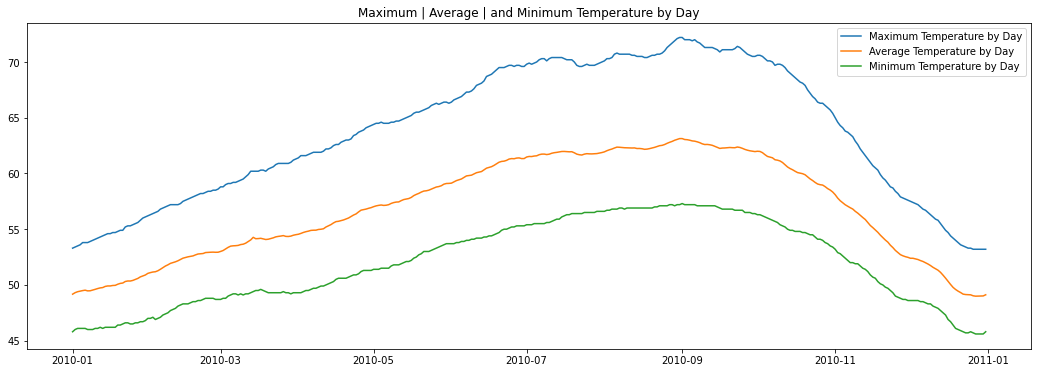

In [25]:
plt.figure(figsize = (18, 6))

plt.plot(df_sf.resample('D').max(), label = 'Maximum Temperature by Day')
plt.plot(df_sf.resample('D').mean(), label = 'Average Temperature by Day')
plt.plot(df_sf.resample('D').min(), label = 'Minimum Temperature by Day')

plt.legend()
plt.title('Maximum | Average | and Minimum Temperature by Day')
plt.show();

# `seattle_weather`

In [26]:
df_seattle = data.seattle_weather()
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [27]:
df_seattle.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [28]:
df_seattle.set_index('date', inplace = True)
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Year/Month Highest Average Precipitation
Which year and month combination has the highest amount of precipitation?

In [29]:
df_seattle.resample('M').sum().sort_values(by = 'precipitation', ascending = False).head()

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6
2014-03-31,240.0,400.1,168.2,114.0
2015-11-30,212.6,290.5,104.4,106.4
2012-11-30,210.5,339.8,156.8,96.6
2012-03-31,183.0,296.2,88.0,131.7


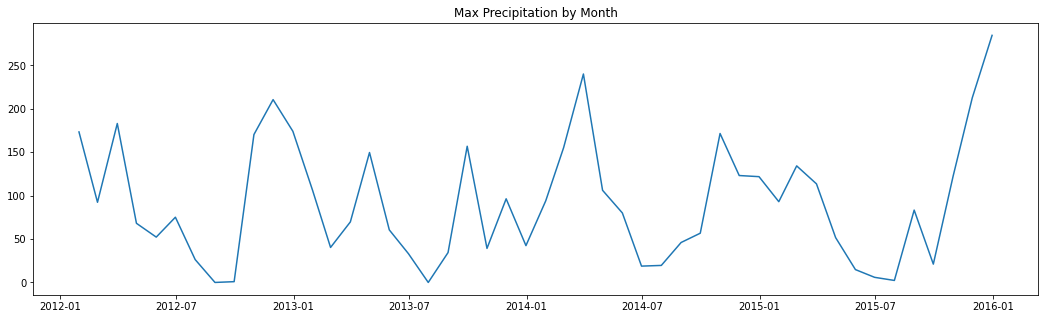

In [48]:
plt.figure(figsize = (18, 5))
plt.plot(df_seattle.resample('M').sum().precipitation)
plt.title('Max Precipitation by Month')
plt.show();

### 2. Monthly Precipitation Over Time
Visualize the amount of monthly precipitation over time.

In [31]:
df_seattle.resample('M').sum()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.3,218.7,47.8,120.9
2012-02-29,92.3,269.0,92.9,113.2
2012-03-31,183.0,296.2,88.0,131.7
2012-04-30,68.1,446.2,179.8,101.2
2012-05-31,52.2,547.5,253.9,104.0
...,...,...,...,...
2015-08-31,83.3,808.7,455.5,97.8
2015-09-30,21.1,608.8,341.0,91.5
2015-10-31,122.4,543.7,325.5,94.1


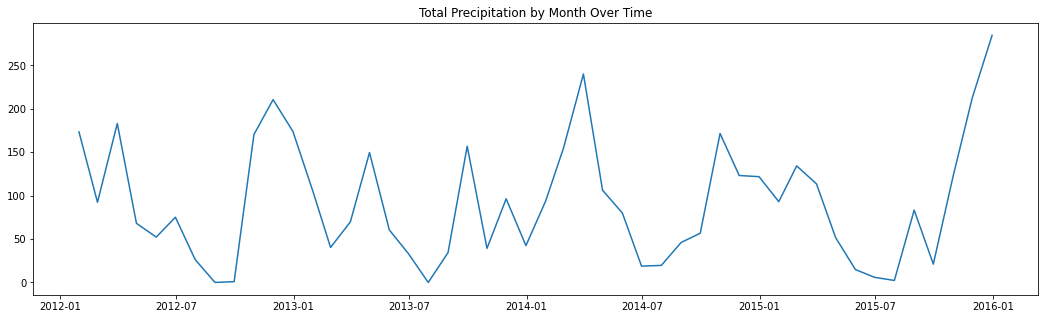

In [32]:
plt.figure(figsize = (18, 5))
plt.plot(df_seattle.resample('M').sum().precipitation)
plt.title('Total Precipitation by Month Over Time')
plt.show();

### 3. Wind Over Time
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [51]:
# by day
df_seattle[['wind']].resample('D').mean().sort_values(by = 'wind', ascending = False).head()

,wind
date,
2012-12-17,9.5
2014-01-11,8.8
2013-12-01,8.8
2012-01-21,8.2
2014-01-12,8.1


In [49]:
# by month
df_seattle[['wind']].resample('M').mean().sort_values(by = 'wind', ascending = False).head()

,wind
date,
2014-02-28,4.528571
2015-12-31,4.341935
2012-03-31,4.248387
2014-11-30,3.983333
2012-02-29,3.903448


In [50]:
# by qrt
df_seattle[['wind']].resample('Q').mean().sort_values(by = 'wind', ascending = False).head()

,wind
date,
2012-03-31,4.019780
2014-03-31,3.828889
2015-12-31,3.642391
2012-12-31,3.531522
2014-12-31,3.482609


In [52]:
# by year
df_seattle[['wind']].resample('Y').mean().sort_values(by = 'wind', ascending = False).head()

,wind
date,
2012-12-31,3.400820
2014-12-31,3.387671
2015-12-31,3.159726
2013-12-31,3.015890


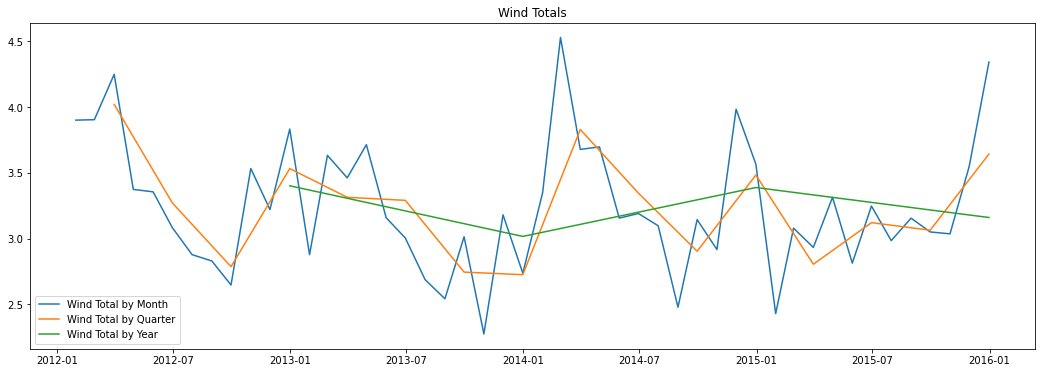

In [54]:
plt.figure(figsize = (18, 6))

# plt.plot(df_seattle[['wind']].resample('D').mean(), label = 'Wind Total by Day')
plt.plot(df_seattle[['wind']].resample('M').mean(), label = 'Wind Total by Month')
plt.plot(df_seattle[['wind']].resample('Q').mean(), label = 'Wind Total by Quarter')
plt.plot(df_seattle[['wind']].resample('Y').mean(), label = 'Wind Total by Year')

plt.legend()
plt.title('Wind Totals')
plt.show()

- wind totals by `day`: too much variability
- wind totals by `year`: to little variablity

wind totals by `month` looks to be the best mix of accuracy and variability

### 4. Windiest Year/Month Combination 
Which year-month combination is the windiest?

In [38]:
df_seattle[['wind']].resample('M').sum().sort_values(by = 'wind', ascending = False)

,wind
date,
2015-12-31,134.6
2012-03-31,131.7
2014-02-28,126.8
2012-01-31,120.9
2014-11-30,119.5
...,...
2012-09-30,79.4
2013-08-31,78.8
2014-08-31,76.8


In [39]:
maxx = df_seattle[['wind']].resample('M').sum().max()

In [40]:
maxx

wind    134.6
dtype: float64

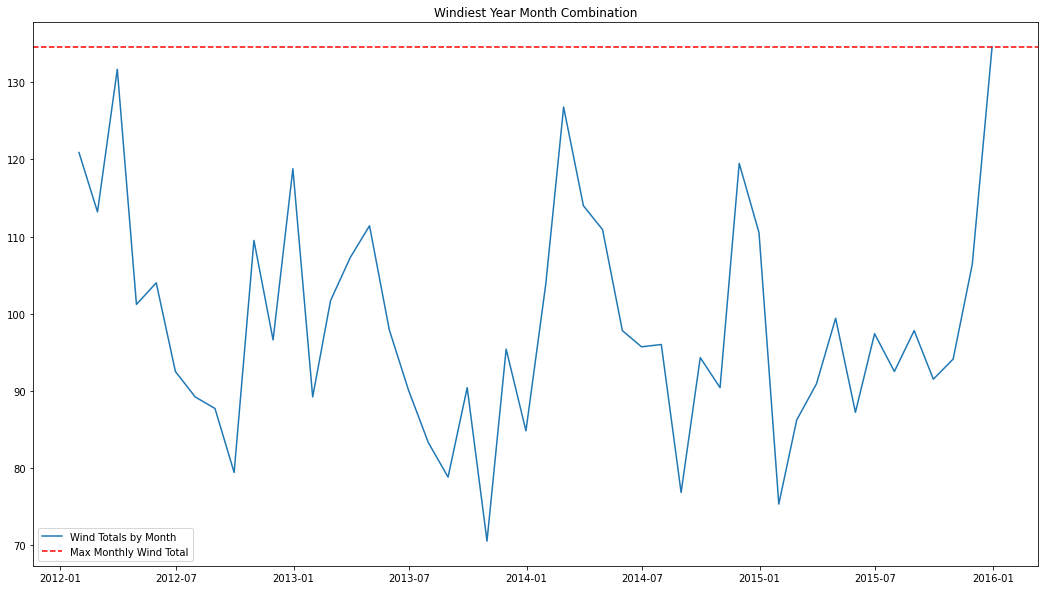

In [41]:
plt.figure(figsize = (18, 10))
plt.plot(df_seattle[['wind']].resample('M').sum(), label = 'Wind Totals by Month')
plt.axhline(y = 134.6, color = 'red', label = 'Max Monthly Wind Total', linestyle='--')
plt.title('Windiest Year Month Combination')

plt.legend()
plt.show()

### 5. Sunniest Year
What's the sunniest year? (Hint: which day has the highest number of days where `weather == sun`?)

In [42]:
pd.concat([df_seattle, pd.get_dummies(df_seattle.weather).sun], axis = 1).resample('Y').sum()[['sun']].\
        sort_values(by = 'sun', ascending = False)

,sun
date,
2014-12-31,211
2013-12-31,205
2015-12-31,180
2012-12-31,118


### 6. Month with the Most Rain
In which month does it rain the most?

In [43]:
df_seattle.resample('M').sum().sort_values(by = 'precipitation', ascending = False).head()

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6
2014-03-31,240.0,400.1,168.2,114.0
2015-11-30,212.6,290.5,104.4,106.4
2012-11-30,210.5,339.8,156.8,96.6
2012-03-31,183.0,296.2,88.0,131.7


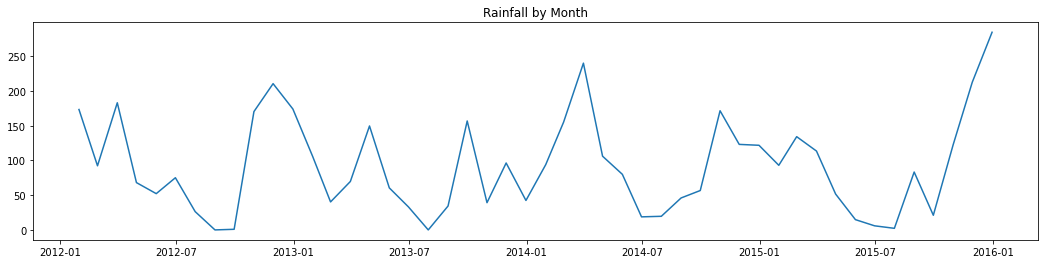

In [44]:
plt.figure(figsize = (18, 4))

plt.plot(df_seattle.resample('M').sum().precipitation)
plt.title('Rainfall by Month')
plt.show()

### 7. Month with Highest Non-zero Amount of Precipitation
Which month has the most number of days with a non-zero amount of precipitation?
- How many days in each month was the precipitation != 0?
- What days was the precipitation != 0?

In [45]:
df_seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [55]:
df_seattle['did_rain'] = df_seattle.precipitation > 0
df_seattle

,precipitation,temp_max,temp_min,wind,weather,did_rain
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,True
2012-01-03,0.8,11.7,7.2,2.3,rain,True
2012-01-04,20.3,12.2,5.6,4.7,rain,True
2012-01-05,1.3,8.9,2.8,6.1,rain,True
...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,True
2015-12-28,1.5,5.0,1.7,1.3,fog,True
2015-12-29,0.0,7.2,0.6,2.6,fog,False


In [59]:
df_seattle.resample('M').sum().sort_values(by = 'did_rain', ascending = False)

,precipitation,temp_max,temp_min,wind,did_rain
date,,,,,
2012-12-31,174.0,224.3,102.1,118.8,27
2015-12-31,284.5,259.8,118.6,134.6,25
2012-01-31,173.3,218.7,47.8,120.9,22
2012-03-31,183.0,296.2,88.0,131.7,22
2015-11-30,212.6,290.5,104.4,106.4,20
...,...,...,...,...,...
2012-09-30,0.9,686.4,337.3,79.4,3
2015-07-31,2.3,870.9,480.5,92.5,2
2014-07-31,19.6,833.9,447.2,96.0,2


In [64]:
df_seattle.groupby(df_seattle.index.year).sum()

,precipitation,temp_max,temp_min,wind,did_rain
date,,,,,
2012,1226.0,5591.3,2668.0,1244.7,177
2013,828.0,5861.5,2976.2,1100.8,152
2014,1232.8,6203.5,3161.8,1236.5,150
2015,1139.2,6361.2,3225.0,1153.3,144


In [71]:
df_seattle[df_seattle.index.year == 2012].groupby(df_seattle[df_seattle.index.year == 2012].index.month).sum()

,precipitation,temp_max,temp_min,wind,did_rain
date,,,,,
1,173.3,218.7,47.8,120.9,22
2,92.3,269.0,92.9,113.2,19
3,183.0,296.2,88.0,131.7,22
4,68.1,446.2,179.8,101.2,17
5,52.2,547.5,253.9,104.0,10
...,...,...,...,...,...
8,0.0,801.6,434.3,87.7,0
9,0.9,686.4,337.3,79.4,3
10,170.3,490.7,259.8,109.5,16


# `flights_20k`

### 1. Negative Delays --> `0`
Convert any negative delays to 0.

### 2. Day/Week Difference in Delay
Does the day of the week make a difference in the delay amount?

### 3. Month Difference in Delay
Does the month make a difference in the delay amount?

# *Bonus* | `iowa_electricity`

# *Bonus* | `sf_temps`

# Explore `birdstrike`